# Shapefile in Python

  - read this [page](https://pythonhosted.org/Python%20Shapefile%20Library/) to learn how to access the data in a shapefile where we access in ```R``` like so: ```SF@data$ID```


In [1]:
import pandas as pd

import datetime
from datetime import date
import datetime
import time

import numpy as np
import sys
import glob
import os, os.path
from os import listdir
from os.path import isfile, join

import re # regular expression

import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sb

import rasterio
from rasterio.mask import mask
from rasterio.plot import show
import shapefile

from shapely.geometry import shape, mapping

import rioxarray as rxr
import xarray as xr
import fiona
# import geopandas as gpd
import earthpy as et
import earthpy.plot as ep

# search path for modules
# look @ https://stackoverflow.com/questions/67631/how-to-import-a-module-given-the-full-path
sys.path.append('/Users/hn/Documents/00_GitHub/Ag/NASA/Python_codes/')
import NASA_core as nc

import NASA_plot_core as npc

In [16]:
dir_base = "/Users/hn/Documents/01_research_data/NASA/"
raster_dir = dir_base + "snapshots/01_raster_GEE/snapshot_Monterey/"
SF_dir = dir_base + "/shapefiles/train_SF_NASSout_Irr_CorrectYr/clean_Monterey_centroids/"

In [17]:
# list of TIFF files with TOA in their names:

Tiff_files = [x for x in os.listdir(raster_dir) if x.endswith(".tif")]
TOA_files = [s for s in Tiff_files if "TOA" in s]
TOA_files = np.sort(TOA_files)

# Read a Raster

A raster file can be read by ```rasterio``` or ```rxr```. Plotting and clipping them will be different (I guess.)

  - Documentation fo ```rasterio``` is [here](https://rasterio.readthedocs.io/en/latest/topics/plotting.html). 

In [18]:
a_tiff = 2

In [19]:
raster_file = raster_dir + TOA_files[a_tiff];
rasterio_im = rasterio.open(raster_file);

print ("rasterio_im.crs: ",  rasterio_im.crs)
# print ("rasterio_im.transform: ", rasterio_im.transform)
print ("rasterio_im.width: ",  rasterio_im.width)
print ("rasterio_im.height: ",  rasterio_im.height)
print ("rasterio_im.count: ",  rasterio_im.count)
print ("rasterio_im.bounds: ",  rasterio_im.bounds)
print ("rasterio_im.nodatavals: ", rasterio_im.nodatavals)
print ("rasterio_im.meta: ",       rasterio_im.meta)


rasterio_im.crs:  EPSG:4326
rasterio_im.width:  18925
rasterio_im.height:  14729
rasterio_im.count:  3
rasterio_im.bounds:  BoundingBox(left=-122.10000156433789, bottom=35.679915275358034, right=-120.39993988914169, top=37.00304385733768)
rasterio_im.nodatavals:  (None, None, None)
rasterio_im.meta:  {'driver': 'GTiff', 'dtype': 'uint8', 'nodata': None, 'width': 18925, 'height': 14729, 'count': 3, 'crs': CRS.from_epsg(4326), 'transform': Affine(8.983152841195215e-05, 0.0, -122.10000156433789,
       0.0, -8.983152841195215e-05, 37.00304385733768)}


# Read a shapefile

  - A shapefile can be read by ```shapefile``` or ```geopandas```. Plotting and clipping them will be different (I guess.)

Geopanda way of reading a shapefile printing it kills the kernel. I do not know how to subset fields from it to use later for plotting or clipping the raster.

In [21]:
### detect CRS of shapefile by fiona

Fiona_SF = fiona.open(SF_dir + "clean_Monterey_centroids.shp")
Fiona_SF.crs
Fiona_SF.crs['init']
### detect CRS of shapefile by fiona
# geoPanda_SF = gpd.read_file(SF_dir + "clean_Monterey_centroids.shp")
# geoPanda_SF.crs

'epsg:4326'

In [22]:
Fiona_SF.crs['init'].lower()

'epsg:4326'

In [24]:
SF = shapefile.Reader(SF_dir + "clean_Monterey_centroids.shp")

# Geopanda way of reading a shapefile
# printing it kills the kernel. I do not know how to subset fields from it
# to use later for plotting or clipping the raster

# geoPanda_SF = gpd.read_file(SF_dir + "clean_Monterey_centroids.shp")
# geoPanda_SF.crs

In [65]:
Grant_SF_dir = dir_base + "/shapefiles/train_SF_NASSout_Irr_CorrectYr/Grant2017_irr_NASSout_survCorrect_centroids/"
SF_Grant = shapefile.Reader(Grant_SF_dir + "Grant2017_irr_NASSout_survCorrect_centroids.shp")
SF_Grant.records()[0]['LstSrvD']

'2017/07/11'

In [69]:
curr_surv = '2017/07/11' + " 00:00:00"
curr_surv

'2017/07/11 00:00:00'

In [25]:
a_feature = SF.shapeRecords()[0]
a_poly = a_feature.shape.__geo_interface__

print ("_____________________________________________________________________________________________")
print (a_poly) # (GeoJSON format)
print ("_____________________________________________________________________________________________")
print (type(a_poly))

_____________________________________________________________________________________________
{'type': 'Polygon', 'coordinates': [[(-121.47729703297105, 36.56921555918741), (-121.47738586593442, 36.569199695824594), (-121.47748104356931, 36.5693646712821), (-121.47859145928948, 36.571331692749574), (-121.4767989312265, 36.572020149797616), (-121.47563140988241, 36.56990718845483), (-121.47565361830573, 36.569846908518606), (-121.47729703297105, 36.56921555918741)]]}
_____________________________________________________________________________________________
<class 'dict'>


In [26]:
print (a_feature)
print ("____________________________________________________________________________")
print (a_feature.record)
print ("____________________________________________________________________________")
print (a_feature.record.ID)

____________________________________________________________________________
Record #-1: ['Monterey2014_1', 'Miscellaneous Truck Crops', 11.42413138, '2017/05/07', 'T | TRUCK NURSERY AND BERRY CROPS', 46231.8194313, 872.702233978, 28.0, 'Oats', -121.47709584]
____________________________________________________________________________
Monterey2014_1


In [27]:
# dir(shapes[3])
# dir(a_feature)
shapes_in_SF = SF.shapes()
SF.fields

[('DeletionFlag', 'C', 1, 0),
 ['ID', 'C', 80, 0],
 ['CropTyp', 'C', 80, 0],
 ['ExctAcr', 'N', 24, 15],
 ['LstModDat', 'C', 80, 0],
 ['DWRLegend', 'C', 80, 0],
 ['Shape_STAr', 'N', 24, 15],
 ['Shape_STLe', 'N', 24, 15],
 ['majority', 'N', 24, 15],
 ['Category', 'C', 80, 0],
 ['ctr_lat', 'N', 24, 15]]

### Each ```record``` is a list containing an attribute corresponding to each field in the field list.

In [28]:
print (SF.records()[0])
print ("SF.records()[0]['ID']: ", SF.records()[0]['ID'])
print ("SF.records()[0]['CropType']: ", SF.records()[0]['CropTyp'])

Record #0: ['Monterey2014_1', 'Miscellaneous Truck Crops', 11.42413138, '2017/05/07', 'T | TRUCK NURSERY AND BERRY CROPS', 46231.8194313, 872.702233978, 28.0, 'Oats', -121.47709584]
SF.records()[0]['ID']:  Monterey2014_1
SF.records()[0]['CropType']:  Miscellaneous Truck Crops


In [29]:
curr_poly = SF.shapeRecords()[0].shape.__geo_interface__
curr_ID = SF.records()[0]['ID']
curr_crop = SF.records()[0]['CropTyp']

In [30]:
curr_poly

{'type': 'Polygon',
 'coordinates': [[(-121.47729703297105, 36.56921555918741),
   (-121.47738586593442, 36.569199695824594),
   (-121.47748104356931, 36.5693646712821),
   (-121.47859145928948, 36.571331692749574),
   (-121.4767989312265, 36.572020149797616),
   (-121.47563140988241, 36.56990718845483),
   (-121.47565361830573, 36.569846908518606),
   (-121.47729703297105, 36.56921555918741)]]}

# Plot some stuff

### ```rxr``` plot

In [31]:
lidar_chm_im = rxr.open_rasterio(raster_dir + TOA_files[a_tiff], masked=True).squeeze()


The following cell (way of plotting) is from [this website](https://www.earthdatascience.org/courses/use-data-open-source-python/intro-raster-data-python/raster-data-processing/crop-raster-data-with-shapefile-in-python/) and
is not working. It is B&W!!!



In [32]:
# f, ax = plt.subplots(figsize=(12, 10))
# lidar_chm_im.plot.imshow(ax=ax)

# # geoPanda_SF.plot(ax=ax, alpha=.8)
# ax.set(title="Raster Layer with Shapefile Overlayed")

# ax.set_xlim(-122, -121.3)
# ax.set_ylim(36.3, 36.9)
# ax.set_axis_off();
# plt.show();

In [33]:
# f, ax = plt.subplots(figsize=(10, 5))
# rasterio_im.plot.imshow(ax=ax)
# ax.set_axis_off()
# plt.show()


In [34]:
print (type(lidar_chm_im))
print (type(rasterio_im))

<class 'xarray.core.dataarray.DataArray'>
<class 'rasterio.io.DatasetReader'>


# Rasterio Plot

In [35]:
# plt.imshow(rasterio_im.read(1), cmap='pink');
# plt.imshow(rasterio_im.read(2), cmap='pink')



# # show((rasterio_im, 1), cmap='viridis') # <-- plot a single band 1, 2, or 3
# show(rasterio_im);

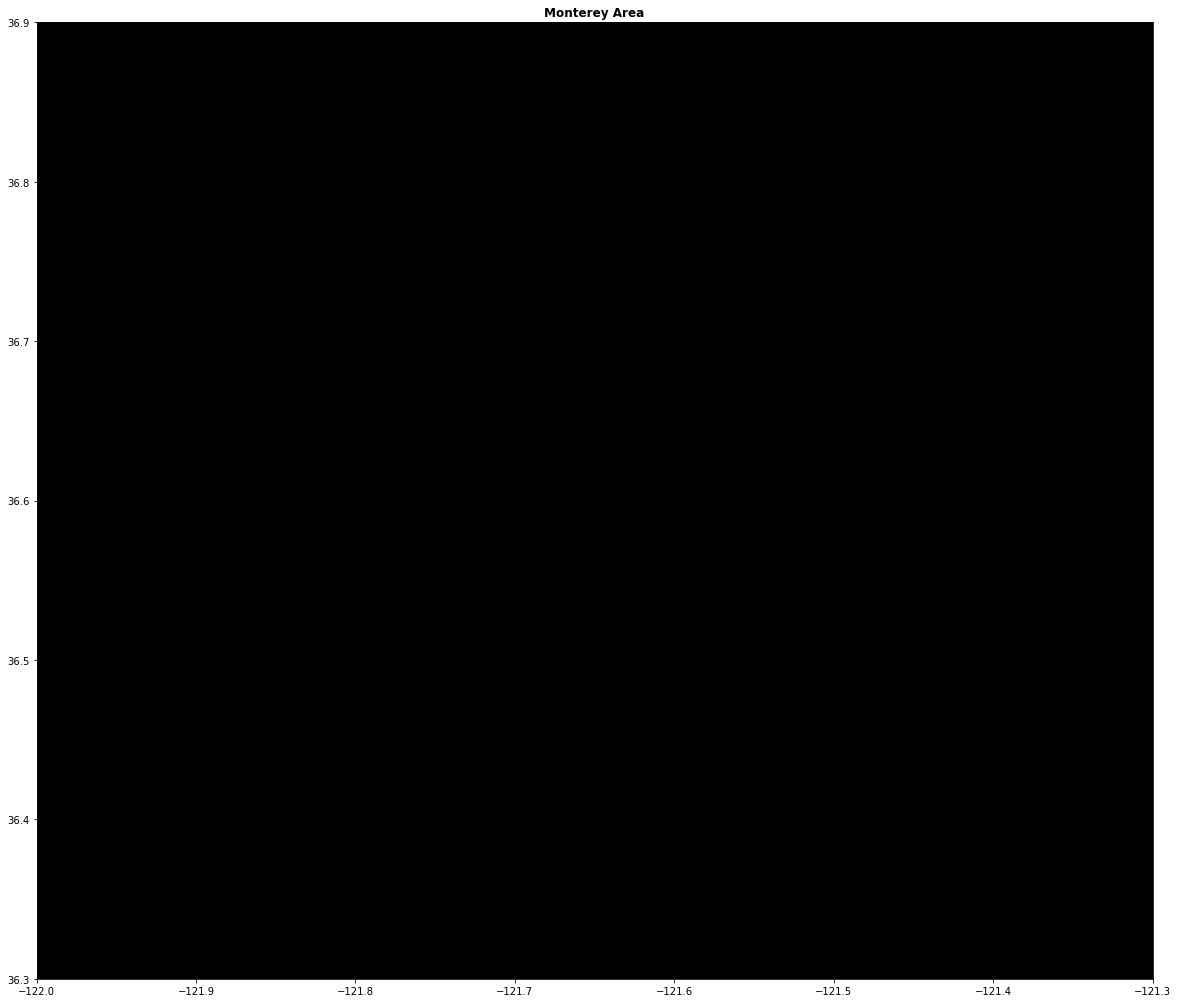

In [36]:
f, ax = plt.subplots(figsize=(20, 20))
# fig, ax = pyplot.subplots(1, 1, figsize=(21,7))
show(rasterio_im, ax=ax, title='Monterey Area')

ax.set_xlim(-122, -121.3)
ax.set_ylim(36.3, 36.9)
plt.show()

In [37]:
print ("rasterio_im.transform: ")
print (rasterio_im.transform)

print ("__________________________________________")
print ("rasterio_im.crs: ",  rasterio_im.crs)

print ("__________________________________________")
print ("type(SF): ", type(SF))

rasterio_im.transform: 
| 0.00, 0.00,-122.10|
| 0.00,-0.00, 37.00|
| 0.00, 0.00, 1.00|
__________________________________________
rasterio_im.crs:  EPSG:4326
__________________________________________
type(SF):  <class 'shapefile.Reader'>


In [38]:
# Clip the raster with Polygon
out_img, out_transform = mask(dataset = rasterio_im, 
                              shapes = [curr_poly], 
                              crop = True)

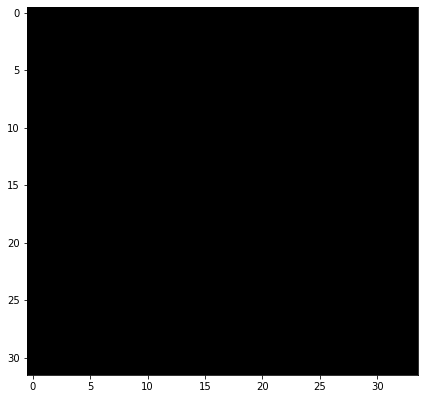

In [39]:
f, ax = plt.subplots(figsize=(7, 7))
# fig, ax = pyplot.subplots(1, 1, figsize=(21,7))
# show(rasterio_im, ax=ax, title='Monterey Area')
show(out_img, ax=ax)

# ax.set_xlim(-122, -121.3)
# ax.set_ylim(36.3, 36.9)
plt.show()

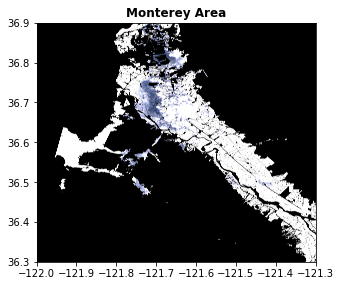

In [41]:
F_name = raster_dir + "1389033673120_L8_TOA_2014-01-01_2015-01-01_.tif"
dark = rasterio.open(F_name);

f, ax = plt.subplots(figsize=(5, 5))
# fig, ax = pyplot.subplots(1, 1, figsize=(21,7))
show(dark, ax=ax, title='Monterey Area')

ax.set_xlim(-122, -121.3)
ax.set_ylim(36.3, 36.9)
plt.show()

# For-Loop to create the fucking panel!

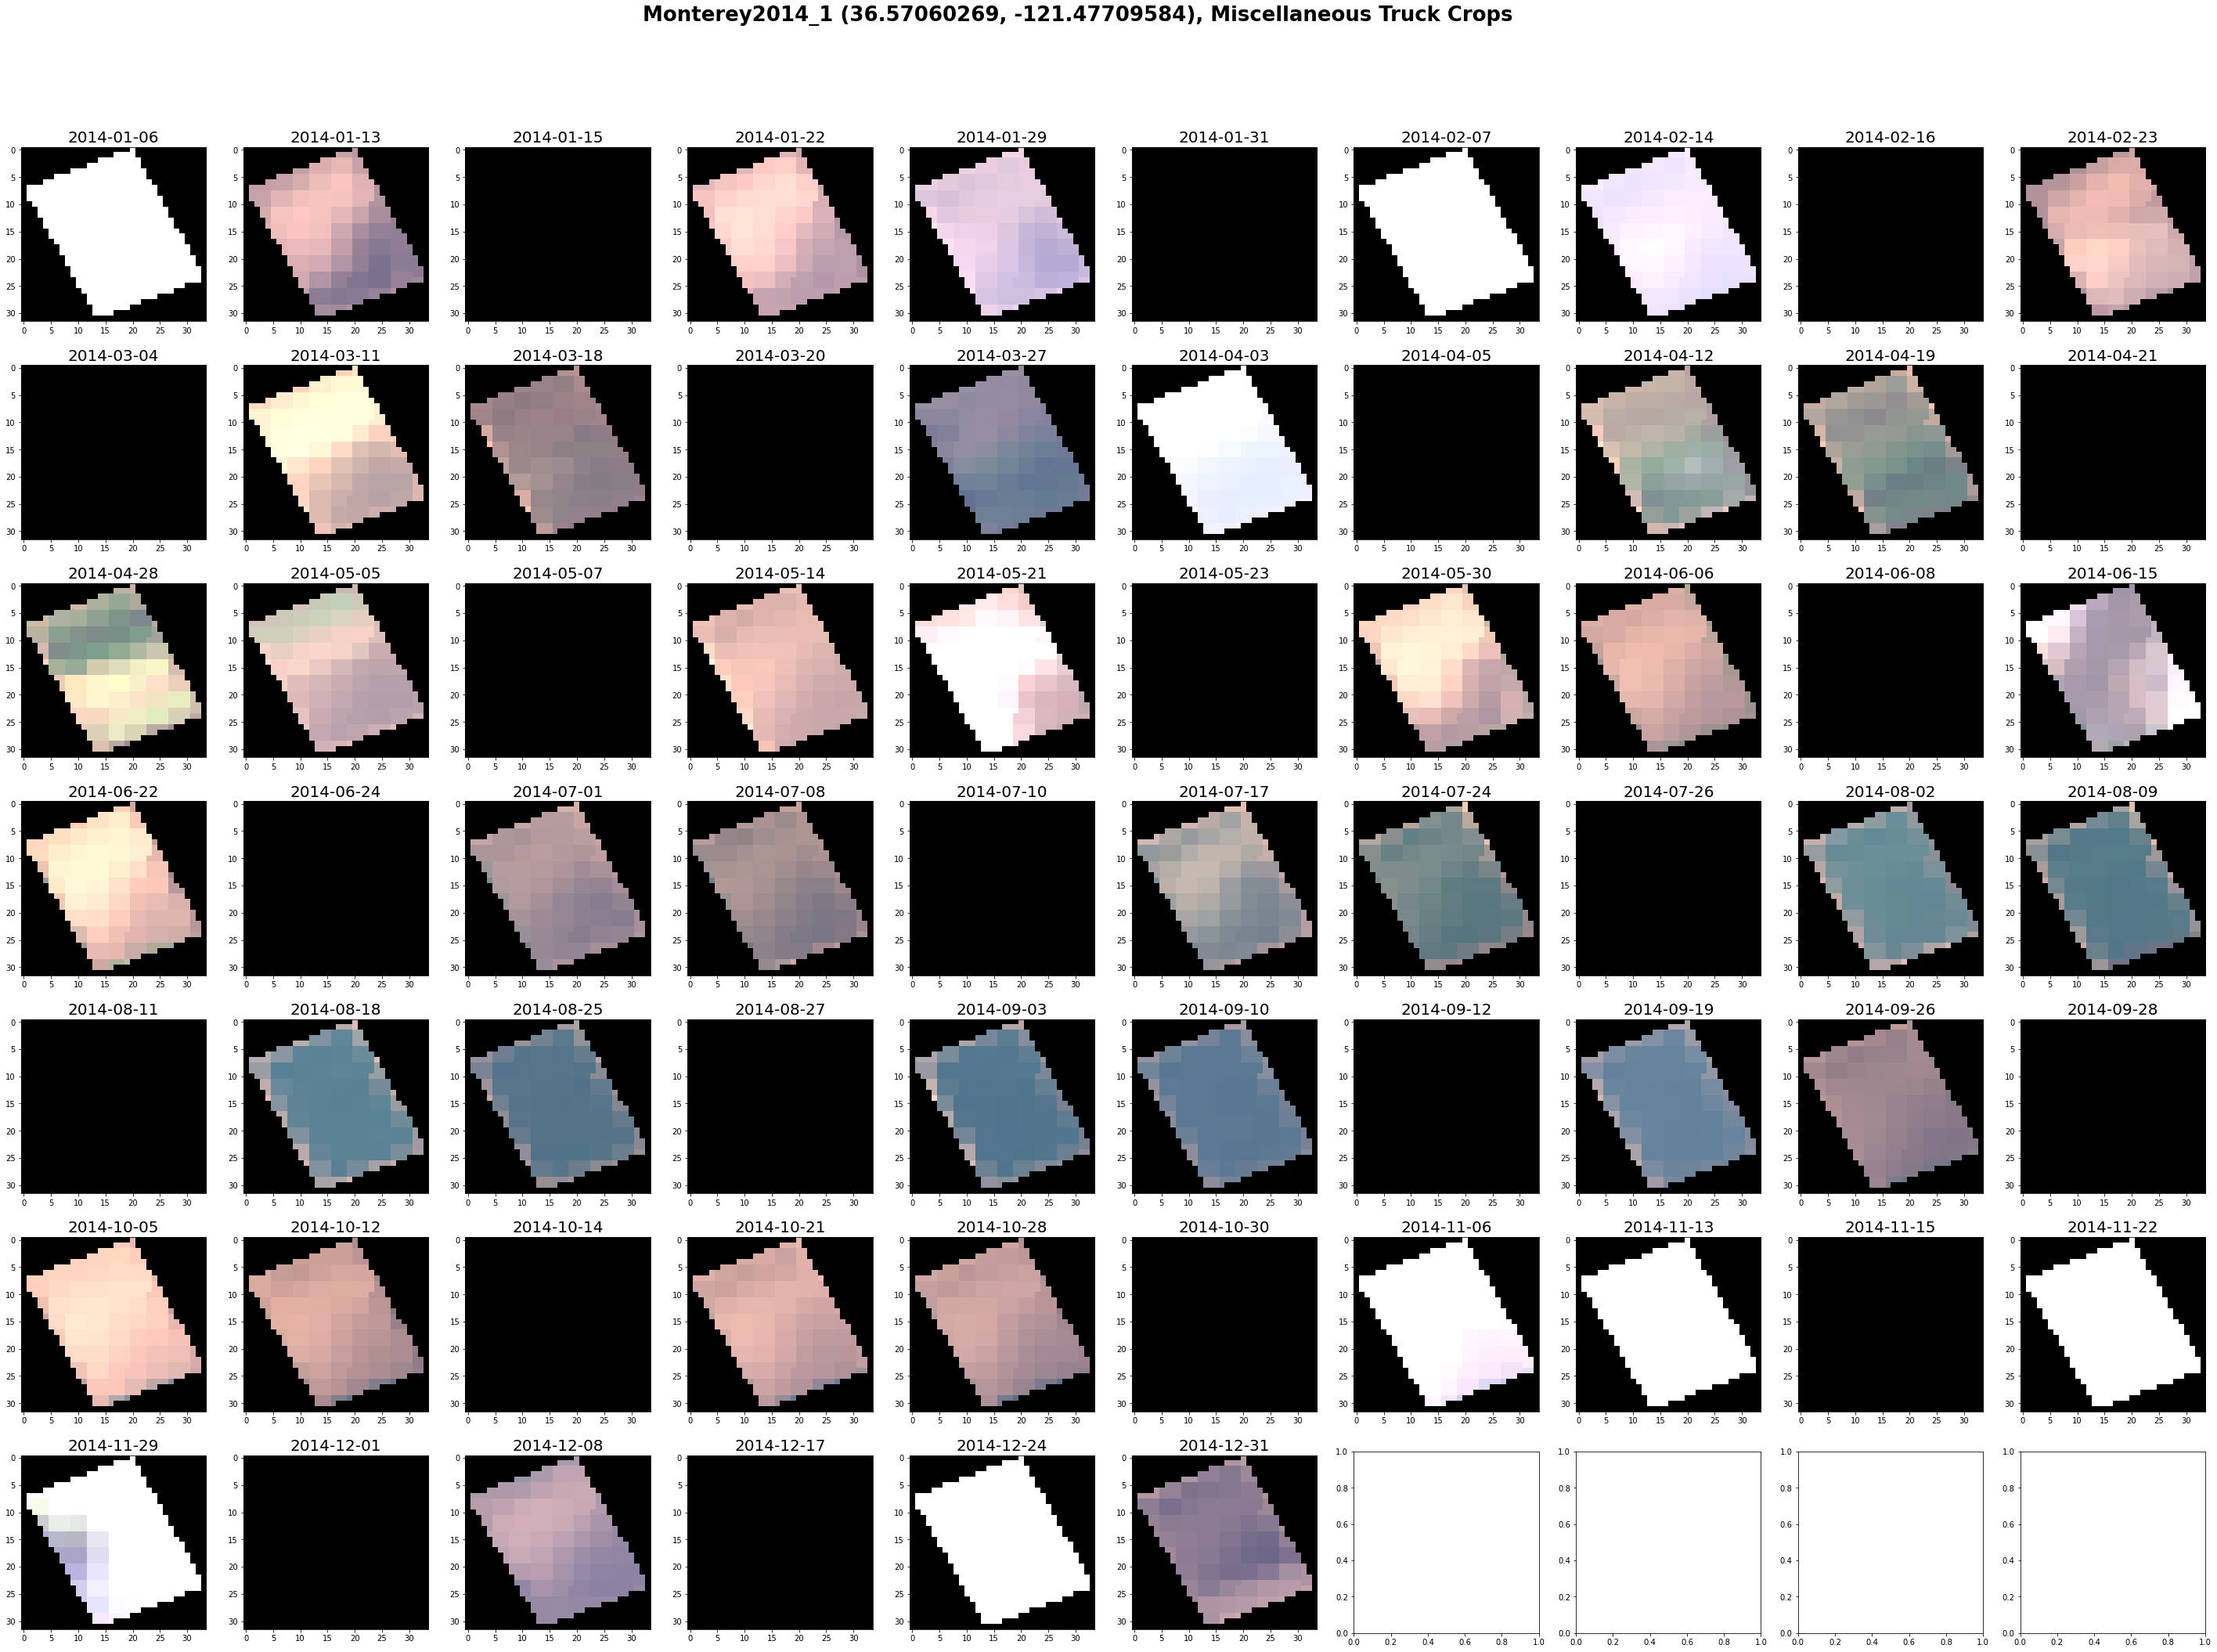

In [63]:
# read the damn shapefile

SF_name = "clean_Monterey_centroids.shp"
SF = shapefile.Reader(SF_dir + SF_name)

# we can check the projectios of shapefiles and rasterfiles are identical!!!!
Fiona_SF = fiona.open(SF_dir + "clean_Monterey_centroids.shp")
SF_CRS = Fiona_SF.crs['init'].lower()

# first fix polygon from shapefile
ii = 0
curr_poly = SF.shapeRecords()[ii].shape.__geo_interface__
curr_ID = SF.records()[ii]['ID']
curr_crop = SF.records()[ii]['CropTyp']

curr_ctr_lat = SF.records()[ii]['ctr_lat']
curr_ctr_long = SF.records()[ii]['ctr_long']

max_no_pictures = len(TOA_files)
n_columns = 10
n_rows = int(np.ceil(max_no_pictures/n_columns))

subplot_size = 5
plot_width = n_columns*subplot_size
plot_length = n_rows*5
fig, axes = plt.subplots(nrows=n_rows, ncols=n_columns, figsize=(plot_width, plot_length))

col_idx = 0
row_idx = 0

independent_count = 0
for count, file in enumerate(TOA_files):
    curr_raster_file = raster_dir + file;
    curr_rasterio_im = rasterio.open(curr_raster_file);
    
    # Sanity check: Projection of SF file and rasterfile
    assert(str(rasterio_im.crs).lower() == Fiona_SF.crs['init'].lower())
    
    out_img, out_transform = mask(dataset = curr_rasterio_im, 
                                  shapes = [curr_poly], 
                                  crop = True)
        
    # if image is completely black, skip it:
    # if sum(sum(sum(out_img))) != 0:    
    # form the damn title!
    curr_time = int(file.split("_")[0]) / 1000
    # convert epoch time to human time
    curr_time = time.strftime('%Y-%m-%d', time.localtime(curr_time))

    row_idx = count // 10 # this is the same as floor(count/10).
    col_idx = count % 10  # remainder of the division. (0-9 goes to 0-9, 10-19 is mapped to 0-9, ...)
    curr_ax = axes[row_idx][col_idx]
    # show(out_img, ax=curr_ax, title=curr_time)
    show(out_img, ax=curr_ax)
    curr_ax.set_title(curr_time, fontsize=20)

# Title of the figure
figure_title = curr_ID + " (" + str(curr_ctr_lat) + ", " + str(curr_ctr_long) + ")" + ", " + curr_crop
fig.suptitle(figure_title, fontsize=26, fontweight='bold', y=0.95)
# plt.title('figure_title', fontsize=25, fontweight="bold", y=2)
    
plot_path = "/Users/hn/Desktop/"
os.makedirs(plot_path, exist_ok=True)

fig_name = plot_path + curr_ID + "_" + str(curr_ctr_lat) + "_" + str(curr_ctr_ong) +'.pdf'
# plt.savefig(fname = fig_name, dpi=100, bbox_inches='tight')
# plt.close('all')
    

In [61]:
type(curr_ctr_lat)

float

In [ ]:
# max_no_pictures = len(TOA_files)
# n_columns = 10
# n_rows = int(np.ceil(max_no_pictures/n_columns))

# subplot_size = 5
# plot_width = n_columns*subplot_size
# plot_length = n_rows*5

# fig, axes = plt.subplots(nrows=n_rows, ncols=n_columns, figsize=(plot_width, plot_length))
# curr_ax = axes[0][1]
# show(out_img, ax = curr_ax, title='Monterey Area')
# plt.show()

IndexError: "LstSrvD" is not a field name and not an int

True
BoundingBox(left=-122.10000156433789, bottom=35.679915275358034, right=-120.39993988914169, top=37.00304385733768)


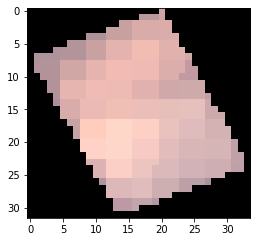

In [50]:
raster_file = raster_dir + TOA_files[9];
rasterio_im = rasterio.open(raster_file);

# f, ax = plt.subplots(figsize=(5, 5))
# # fig, ax = pyplot.subplots(1, 1, figsize=(21,7))
# show(rasterio_im, ax=ax, title='Monterey Area')

# ax.set_xlim(-122, -121.3)
# ax.set_ylim(36.3, 36.9)
# plt.show()

print (not rasterio_im.meta['nodata'])
print (rasterio_im.bounds)

out_img, out_transform = mask(dataset = rasterio_im, 
                              shapes = [curr_poly], 
                              crop = True)

f, ax = plt.subplots(figsize=(4, 4))
# fig, ax = pyplot.subplots(1, 1, figsize=(21,7))
# show(rasterio_im, ax=ax, title='Monterey Area')
show(out_img, ax=ax)

# ax.set_xlim(-122, -121.3)
# ax.set_ylim(36.3, 36.9)
plt.show()

In [52]:
# TOA_files == np.sort(TOA_files)

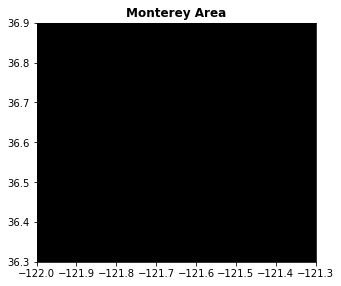

True


BoundingBox(left=-122.10000156433789, bottom=35.679915275358034, right=-120.39993988914169, top=37.00304385733768)

In [53]:
raster_file = raster_dir + TOA_files[2];
rasterio_im = rasterio.open(raster_file);

f, ax = plt.subplots(figsize=(5, 5))
# fig, ax = pyplot.subplots(1, 1, figsize=(21,7))
show(rasterio_im, ax=ax, title='Monterey Area')

ax.set_xlim(-122, -121.3)
ax.set_ylim(36.3, 36.9)
plt.show()
print (not rasterio_im.meta['nodata'])
rasterio_im.bounds

In [44]:
# read the damn shapefile

SF_name = "clean_Monterey_centroids.shp"
SF = shapefile.Reader(SF_dir + SF_name)

# we can check the projectios of shapefiles and rasterfiles are identical!!!!
Fiona_SF = fiona.open(SF_dir + "clean_Monterey_centroids.shp")
SF_CRS = Fiona_SF.crs['init'].lower()

# first fix polygon from shapefile
ii = 0
curr_poly = SF.shapeRecords()[ii].shape.__geo_interface__
curr_ID = SF.records()[ii]['ID']
curr_crop = SF.records()[ii]['CropTyp']

max_no_pictures = len(TOA_files)
n_columns = 10
n_rows = int(np.ceil(max_no_pictures/n_columns))

subplot_size = 5
plot_width = n_columns*subplot_size
plot_length = n_rows*5
fig, axes = plt.subplots(nrows=n_rows, ncols=n_columns, figsize=(plot_width, plot_length))

col_idx = 0
row_idx = 0

independent_count = 0
for count, file in enumerate(TOA_files):
    curr_raster_file = raster_dir + file;
    curr_rasterio_im = rasterio.open(curr_raster_file);
    
    # Sanity check: Projection of SF file and rasterfile
    assert(str(rasterio_im.crs).lower() == Fiona_SF.crs['init'].lower())
    
    out_img, out_transform = mask(dataset = curr_rasterio_im, 
                                  shapes = [curr_poly], 
                                  crop = True)
        
    # if image is completely black, skip it:
    if sum(sum(sum(out_img))) != 0:
        # form the damn title!
        curr_time = int(file.split("_")[-1].split(".")[0]) / 1000
        # convert epoch time to human time
        curr_time = time.strftime('%Y-%m-%d', time.localtime(curr_time))

        row_idx = independent_count // 10 # this is the same as floor(count/10).
        col_idx = independent_count % 10  # remainder of the division. (0-9 goes to 0-9, 10-19 is mapped to 0-9, ...)
        curr_ax = axes[row_idx][col_idx]
        # show(out_img, ax=curr_ax, title=curr_time)
        show(out_img, ax=curr_ax)
        curr_ax.set_title(curr_time, fontsize=20)
        independent_count += 1

# Title of the figure
figure_title = curr_ID + ", " + curr_crop
fig.suptitle(figure_title, fontsize=26, fontweight='bold', y=0.9)
# plt.title('figure_title', fontsize=25, fontweight="bold", y=2)
    
plot_path = "/Users/hn/Desktop/"
os.makedirs(plot_path, exist_ok=True)

fig_name = plot_path + curr_ID +'_ind.pdf'
plt.savefig(fname = fig_name, dpi=100, bbox_inches='tight')
plt.close('all')

ShapefileException: Unable to open /Users/hn/Documents/01_research_data/NASA//shapefiles/train_SF_NASSout_Irr_CorrectYr/clean_Monterey_centroids/clean_Monterey.dbf or /Users/hn/Documents/01_research_data/NASA//shapefiles/train_SF_NASSout_Irr_CorrectYr/clean_Monterey_centroids/clean_Monterey.shp.

In [ ]:
# read the damn shapefile

SF_name = "clean_Monterey.shp"
SF = shapefile.Reader(SF_dir + SF_name)

# we can check the projectios of shapefiles and rasterfiles are identical!!!!
Fiona_SF = fiona.open(SF_dir + "clean_Monterey.shp")
SF_CRS = Fiona_SF.crs['init'].lower()

# first fix polygon from shapefile
ii = 0
curr_poly = SF.shapeRecords()[ii].shape.__geo_interface__
curr_ID = SF.records()[ii]['ID']
curr_crop = SF.records()[ii]['CropTyp']

######## First count the number of all black images to set figure size properly
black_count = 0
for count, file in enumerate(TOA_files):
    curr_raster_file = raster_dir + file;
    curr_rasterio_im = rasterio.open(curr_raster_file);
    
    # Sanity check: Projection of SF file and rasterfile
    assert(str(rasterio_im.crs).lower() == Fiona_SF.crs['init'].lower())
    
    out_img, out_transform = mask(dataset = curr_rasterio_im, 
                                  shapes = [curr_poly], 
                                  crop = True)
    
    if sum(sum(sum(out_img))) == 0:
        black_count += 1

max_no_pictures = len(TOA_files) - black_count
n_columns = 10
n_rows = int(np.ceil(max_no_pictures/n_columns))

subplot_size = 5
plot_width = n_columns*subplot_size
plot_length = n_rows*5
fig, axes = plt.subplots(nrows=n_rows, ncols=n_columns, figsize=(plot_width, plot_length))

col_idx = 0
row_idx = 0

independent_count = 0

for count, file in enumerate(TOA_files):
    curr_raster_file = raster_dir + file;
    curr_rasterio_im = rasterio.open(curr_raster_file);
    
    # Sanity check: Projection of SF file and rasterfile
    assert(str(rasterio_im.crs).lower() == Fiona_SF.crs['init'].lower())
    
    out_img, out_transform = mask(dataset = curr_rasterio_im, 
                                  shapes = [curr_poly], 
                                  crop = True)
        
    # if image is completely black, skip it:
    if sum(sum(sum(out_img))) != 0:
        # form the damn title!
        curr_time = int(file.split("_")[-1].split(".")[0]) / 1000
        # convert epoch time to human time
        curr_time = time.strftime('%Y-%m-%d', time.localtime(curr_time))

        row_idx = independent_count // 10 # this is the same as floor(count/10).
        col_idx = independent_count % 10  # remainder of the division. (0-9 goes to 0-9, 10-19 is mapped to 0-9, ...)
        curr_ax = axes[row_idx][col_idx]
        # show(out_img, ax=curr_ax, title=curr_time)
        show(out_img, ax=curr_ax)
        curr_ax.set_title(curr_time, fontsize=20)
        independent_count += 1

# Title of the figure
figure_title = curr_ID + ", " + curr_crop
fig.suptitle(figure_title, fontsize=26, fontweight='bold', y=0.9)
# plt.title('figure_title', fontsize=25, fontweight="bold", y=2)
    
plot_path = "/Users/hn/Desktop/"
os.makedirs(plot_path, exist_ok=True)

fig_name = plot_path + curr_ID +'_blackOut.pdf'
plt.savefig(fname = fig_name, dpi=100, bbox_inches='tight')
plt.close('all')

In [ ]:
curr_time = 12345689
curr_time = time.strftime('%Y-%m-%d', time.localtime(curr_time))

In [ ]:
curr_time